<a href="https://colab.research.google.com/github/vbhaktha13/datasets/blob/main/Copy_of_Copy_of_Copy_of_Project_tumor_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Melonoma tumor size prediction**
Malignant melanoma (see the image below) is a neoplasm of melanocytes or a neoplasm of the cells that develop from melanocytes. Although it was once considered uncommon, the annual incidence has increased dramatically over the past few decades. Surgery is the definitive treatment for **early-stage melanoma**, with medical management generally reserved for adjuvant treatment of high locally advanced melanoma and metastatic disease. We as a datascientist have a important responsiblity in saving lives by making the models
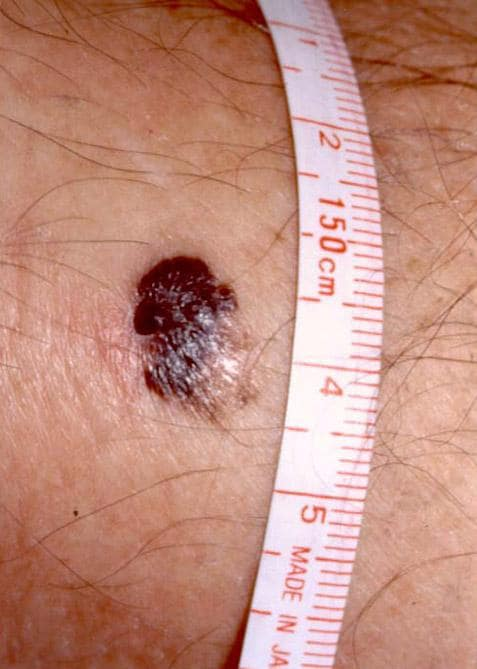

In [ ]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-f_htms7x
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-f_htms7x
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=173973 sha256=2c8e2088b18fcb890132913323a394d44b8a361bdea5257433cad01041a458a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-pzskojvn/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
 !pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.4 MB/s 


In [ ]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [ ]:
pip install scikeras[tensorflow]

     |████████████████████████████████| 462 kB 6.3 MB/s 
     |████████████████████████████████| 97 kB 6.1 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
  Attempting uninstall: markdown
    Found existing installation: Markdown 3.3.6
    Uninstalling Markdown-3.3.6:
      Successfully uninstalled Markdown-3.3.6


In [ ]:
import pathlib

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Model
#from tensorflow.keras.models import Sequential
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Input 
from tensorflow.python.keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print(tf.__version__)

2.8.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

2.1 Get the **Data** 

In [ ]:
url = 'https://raw.githubusercontent.com/vbhaktha13/datasets/bbce2c8b8346d240f444729ec349eaa49c73bbe0/tumor_train.csv'
tumor_train = pd.read_csv(url)

In [ ]:
url = 'https://raw.githubusercontent.com/vbhaktha13/datasets/main/tumor_test.csv'
tumor_test = pd.read_csv(url)

In [ ]:
tumor_train.head(2)

,Id,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,2484,8966.25,2290.10,0.25541,86.3614,1.210154e+06,123.099,3801.09,37,35.3347,2.04
1,7971,23451.80,5523.74,0.23553,318.7650,3.230021e+06,400.988,6233.68,154,19.8012,0.95


In [ ]:
tumor_train.shape

(7316, 11)

In [ ]:
tumor_test.shape

(1830, 10)

In [ ]:
tumor_train.isna().sum()

Id                0
mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [ ]:
tumor_test.isna().sum()

Id                0
mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
dtype: int64

In [ ]:
tumor_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,7316.0,4.572896e+03,2634.666726,1.00000,2298.750000,4.561500e+03,6.850250e+03,9.145000e+03
mass_npea,7316.0,9.903204e+03,4035.017571,2864.76000,6983.410000,8.894730e+03,1.213738e+04,3.699540e+04
size_npear,7316.0,3.033188e+03,1453.517395,520.33000,1986.167500,2.688000e+03,3.846613e+03,1.353500e+04
malign_ratio,7316.0,3.030910e-01,0.062637,0.12161,0.258622,3.006600e-01,3.431325e-01,5.253000e-01
damage_size,7316.0,1.039102e+02,55.303260,10.31010,64.011200,8.860810e+01,1.343580e+02,3.443460e+02
exposed_area,7316.0,1.372354e+06,561087.107307,387853.40250,959820.168650,1.238623e+06,1.696990e+06,4.978616e+06
std_dev_malign,7316.0,1.464097e+02,70.223909,31.97040,95.617575,1.266190e+02,1.825915e+02,5.288900e+02
err_malign,7316.0,3.979876e+03,1472.446085,1089.19000,3175.735000,3.849515e+03,4.671913e+03,5.303130e+04
malign_penalty,7316.0,6.996473e+01,55.756789,0.00000,31.000000,5.400000e+01,9.100000e+01,3.400000e+02
damage_ratio,7316.0,3.444139e+01,5.976883,15.22800,30.211175,3.523625e+01,3.882603e+01,4.654640e+01


observations:
min tumor size is zero and 20 is the max tumor size
damage ratio


In [ ]:
import sweetviz as sv

In [ ]:
tumor_train.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              7316 non-null   int64  
 1   mass_npea       7316 non-null   float64
 2   size_npear      7316 non-null   float64
 3   malign_ratio    7316 non-null   float64
 4   damage_size     7316 non-null   float64
 5   exposed_area    7316 non-null   float64
 6   std_dev_malign  7316 non-null   float64
 7   err_malign      7316 non-null   float64
 8   malign_penalty  7316 non-null   int64  
 9   damage_ratio    7316 non-null   float64
 10  tumor_size      7316 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 628.8 KB


                                             |          | [  0%]   00:00 -> (? left)


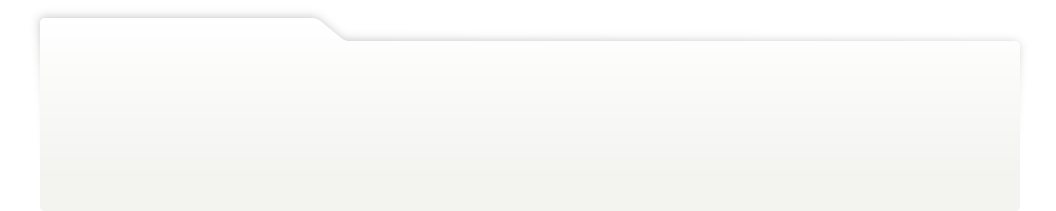
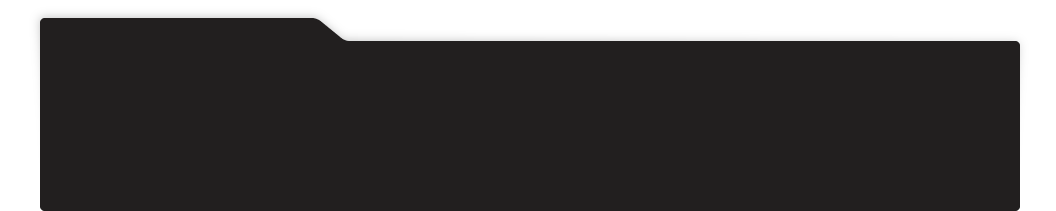
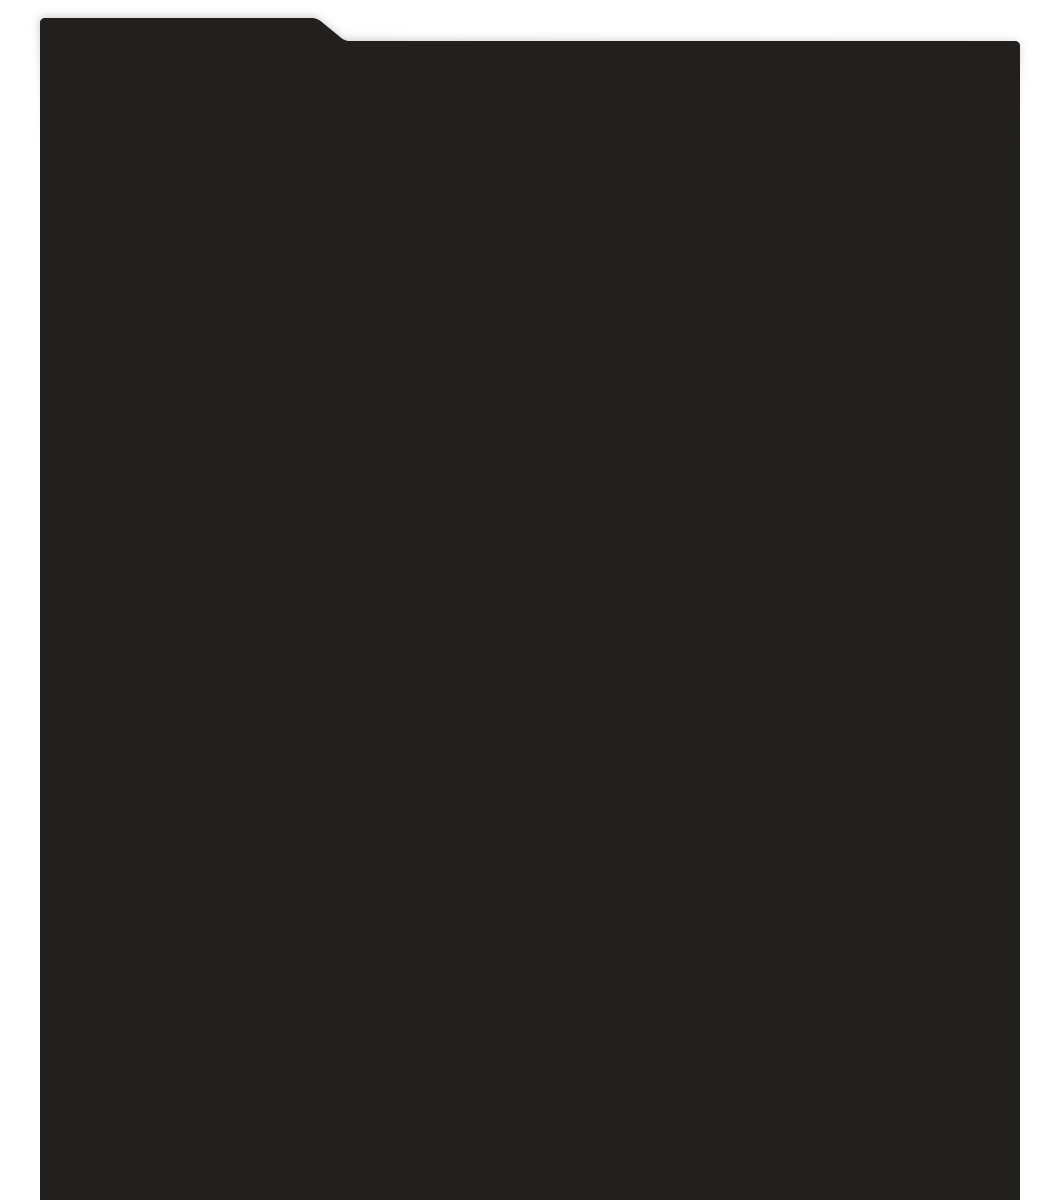
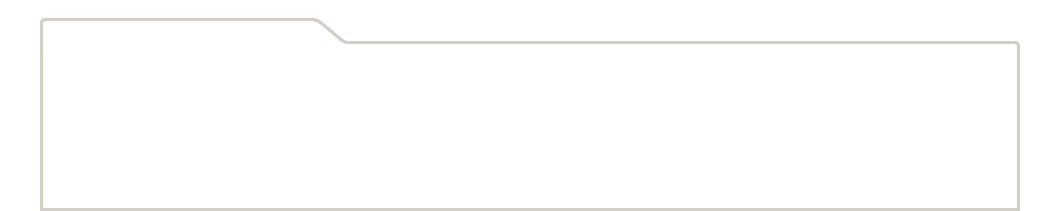
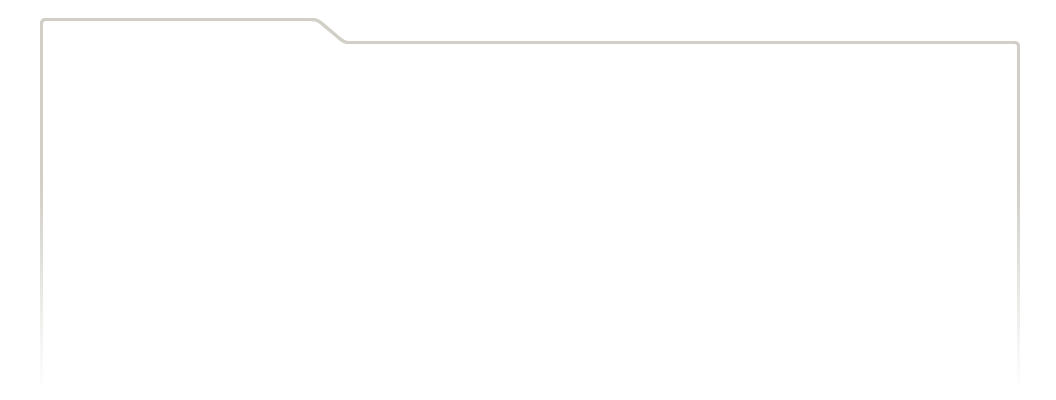
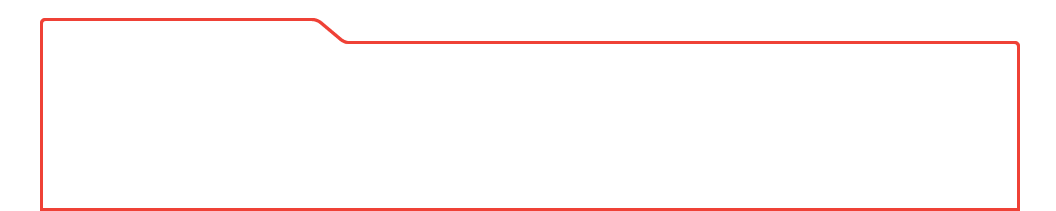
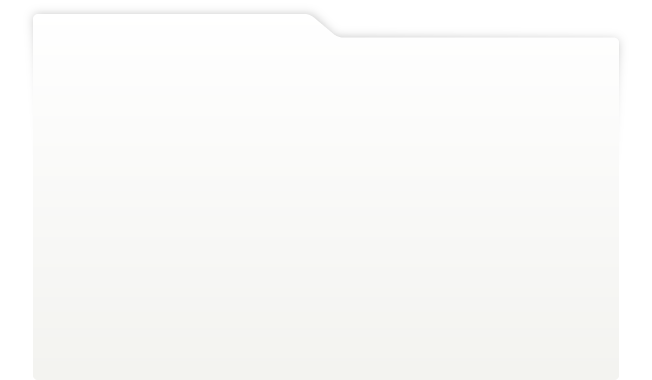
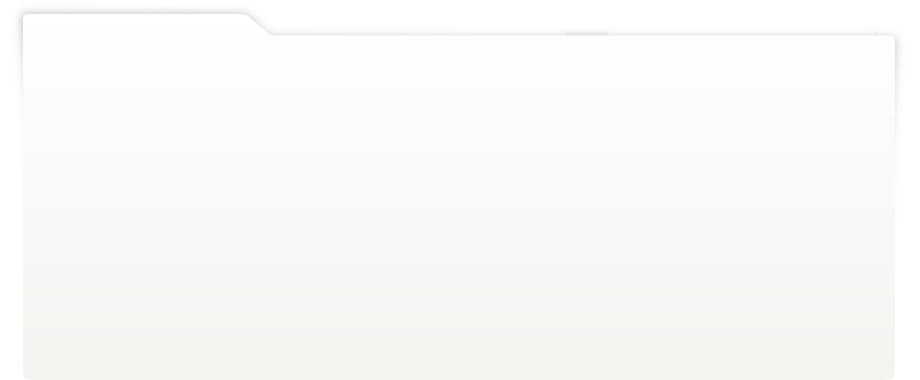
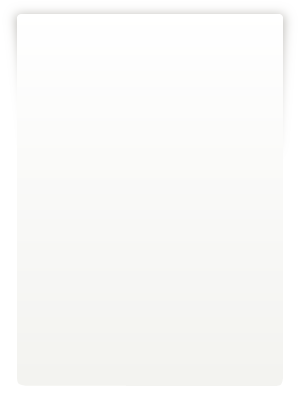
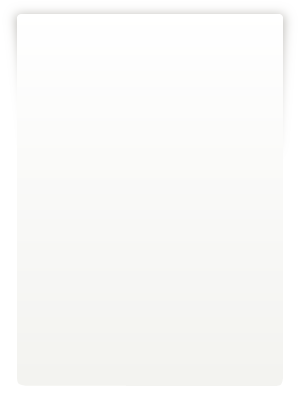
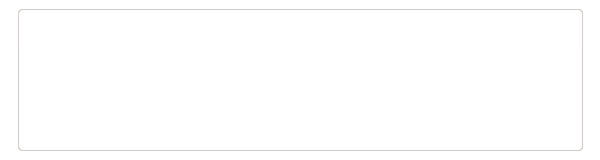
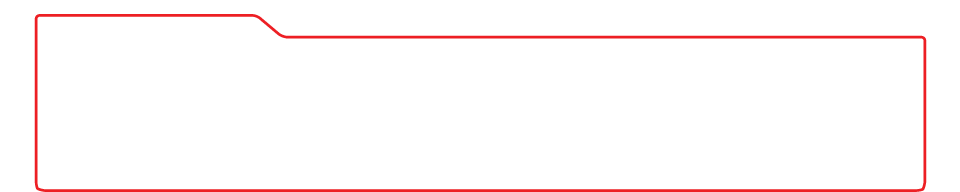
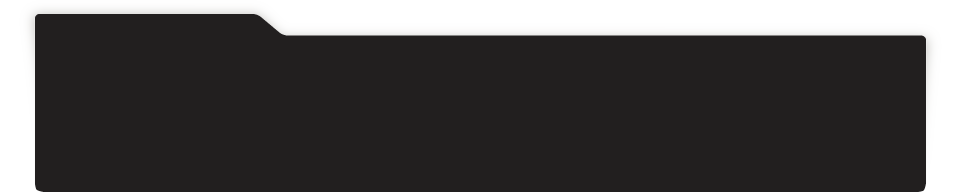
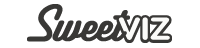
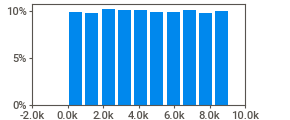
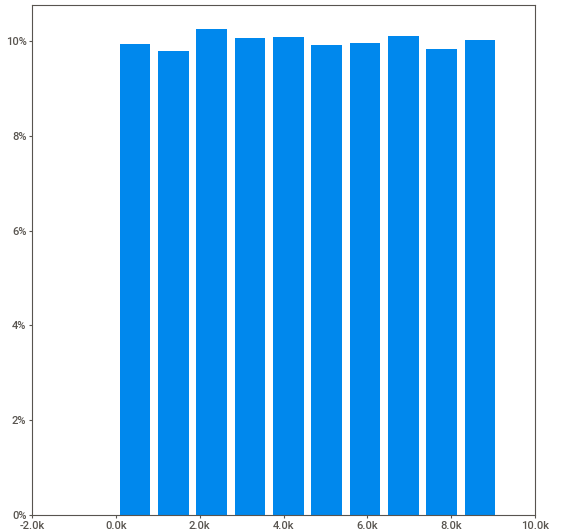
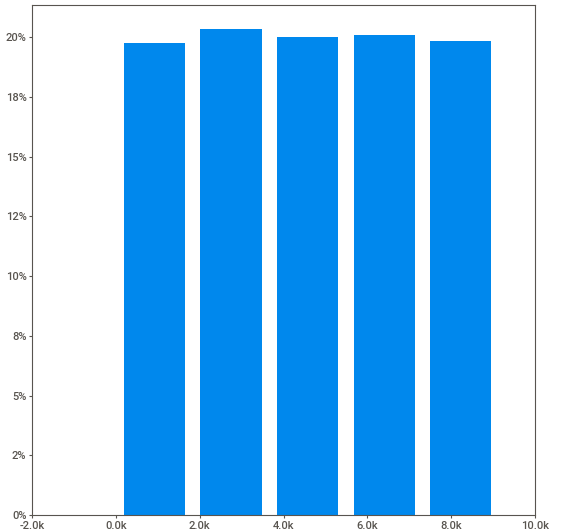
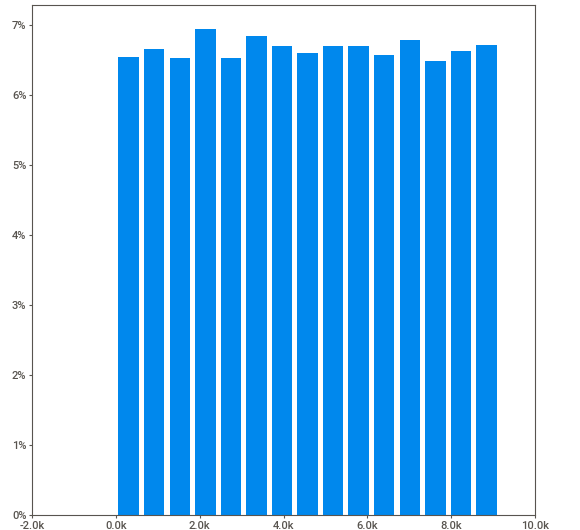
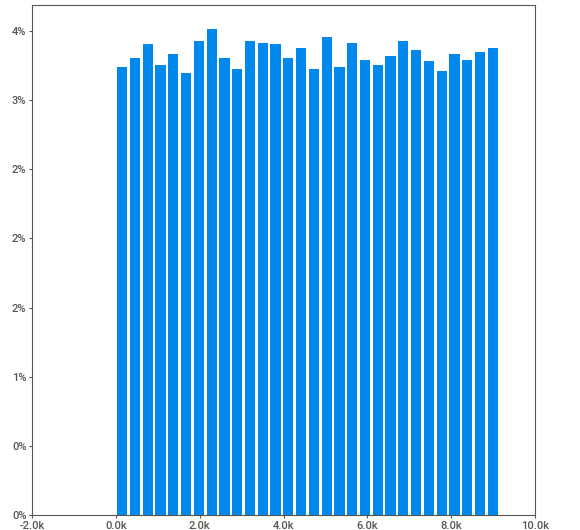
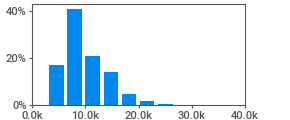
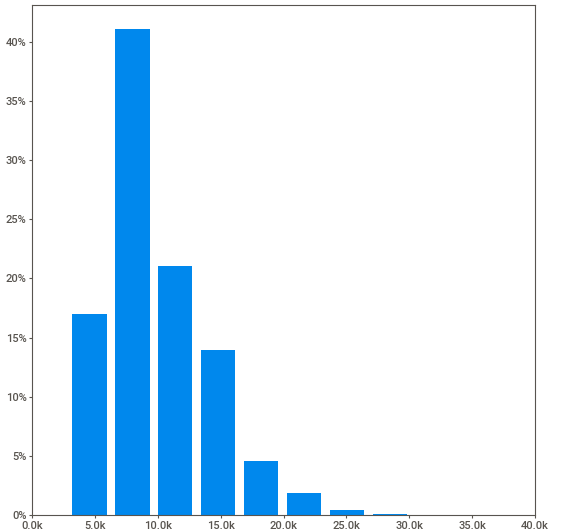
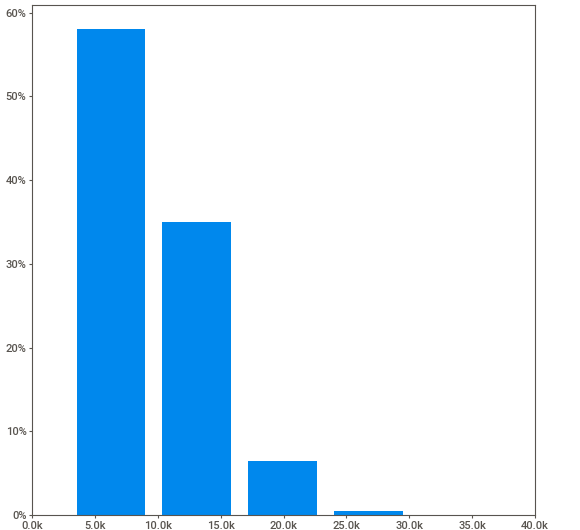
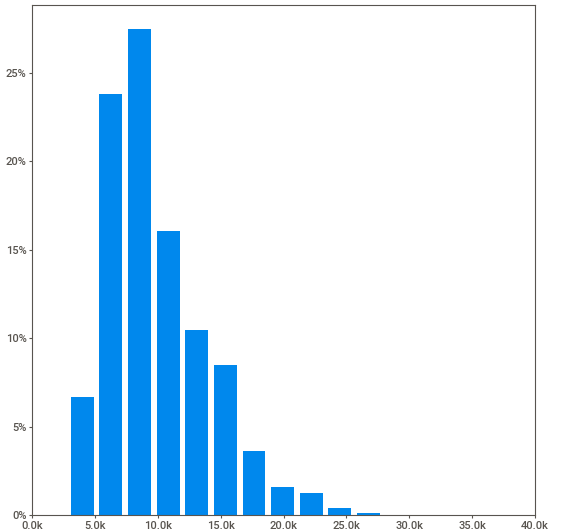
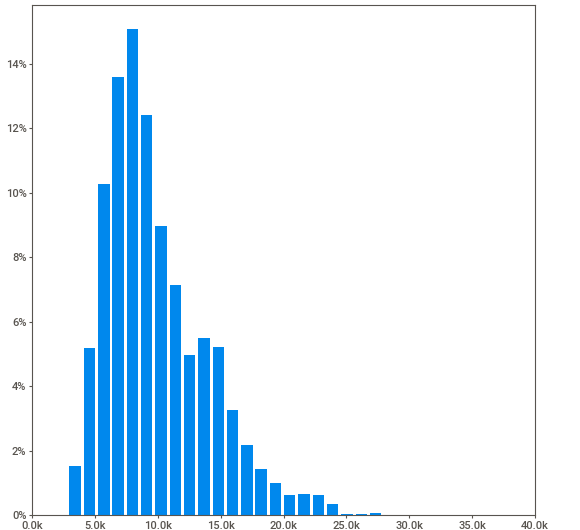
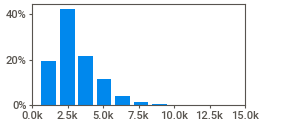
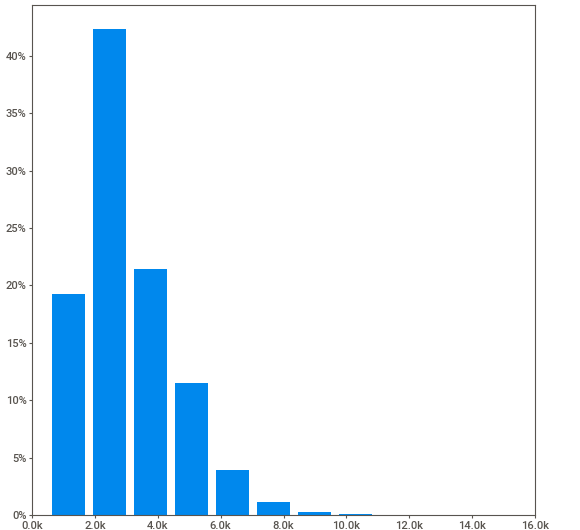
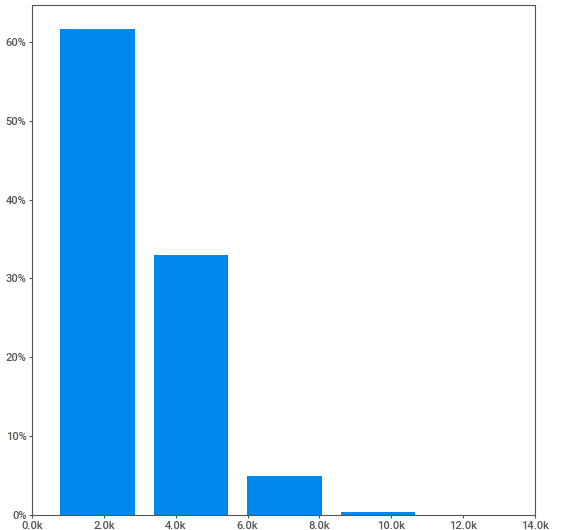
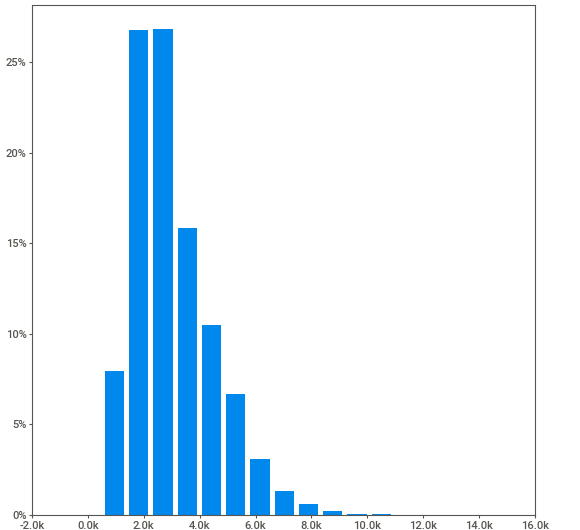
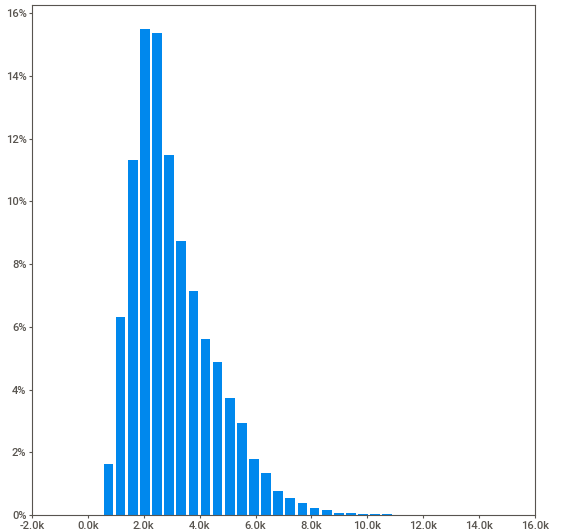
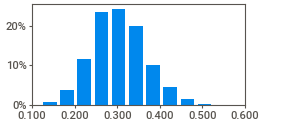
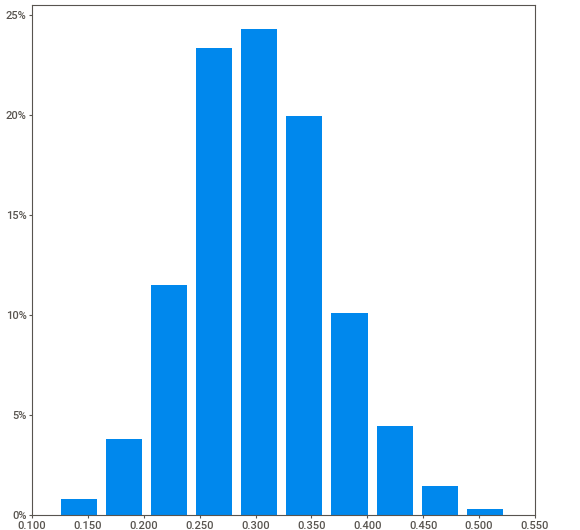
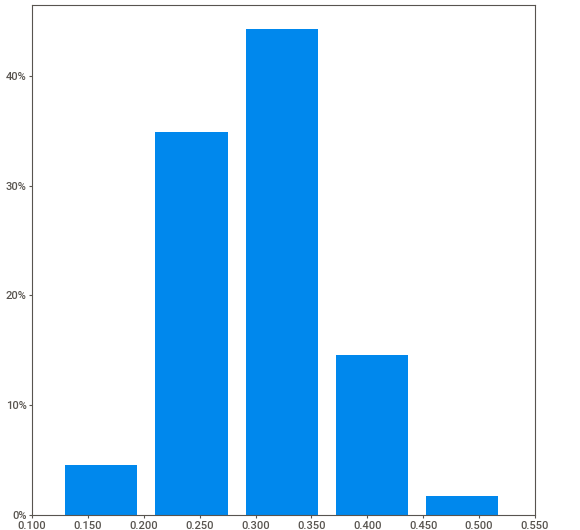
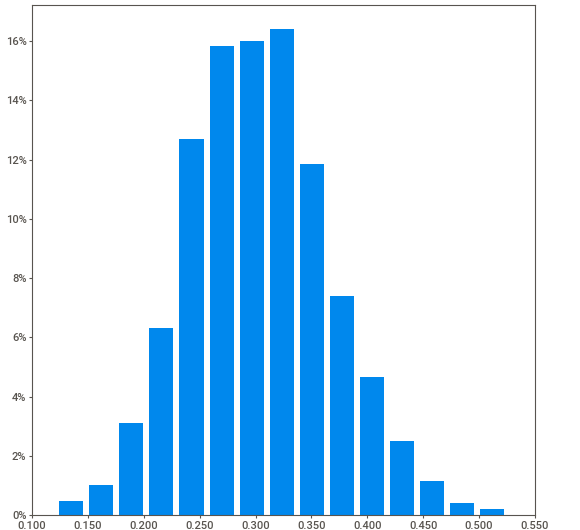
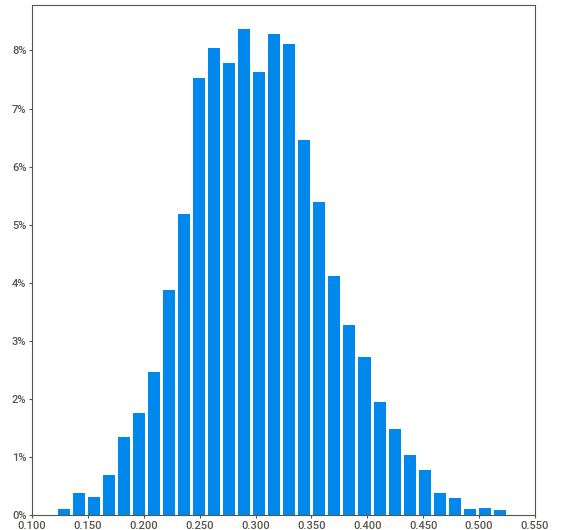
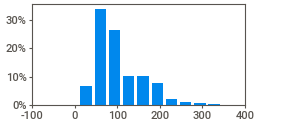
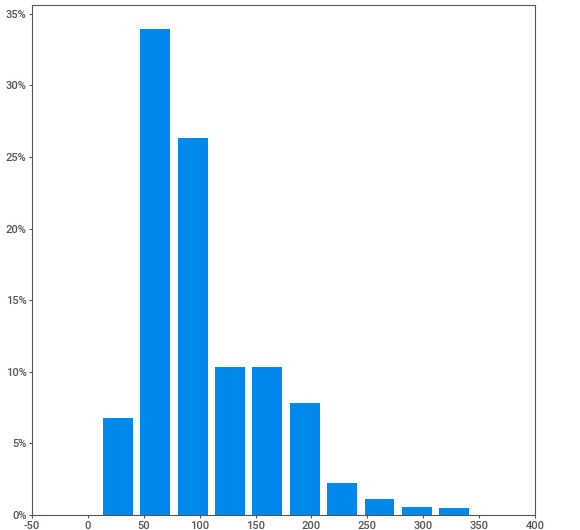
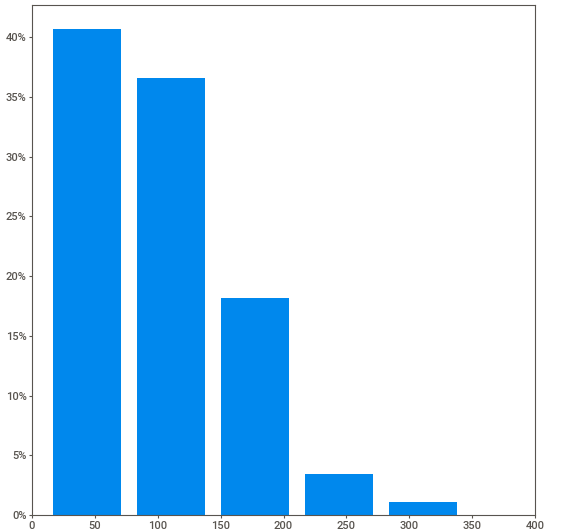
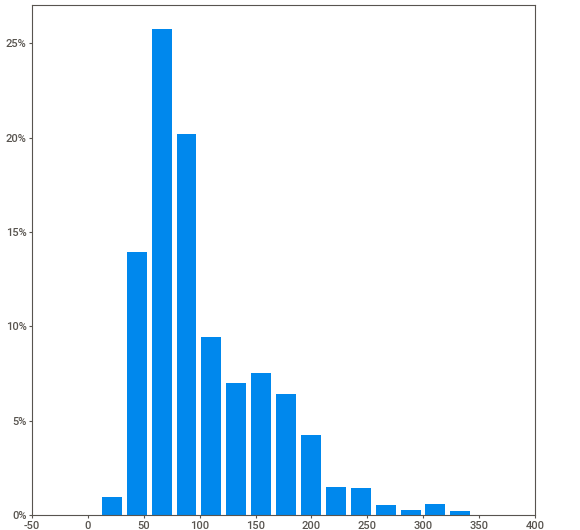
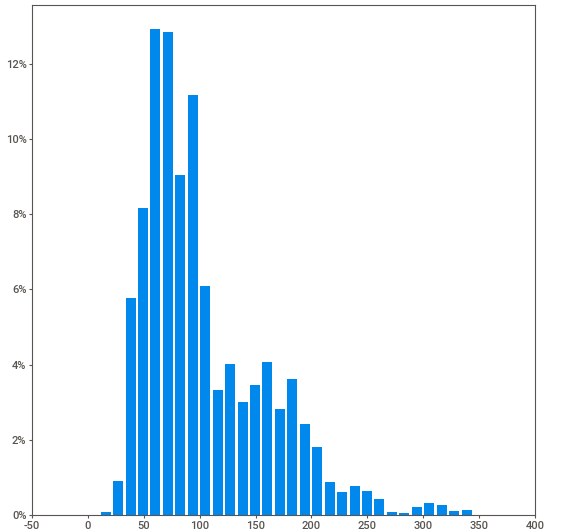
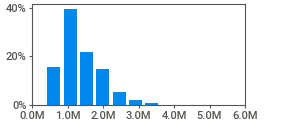
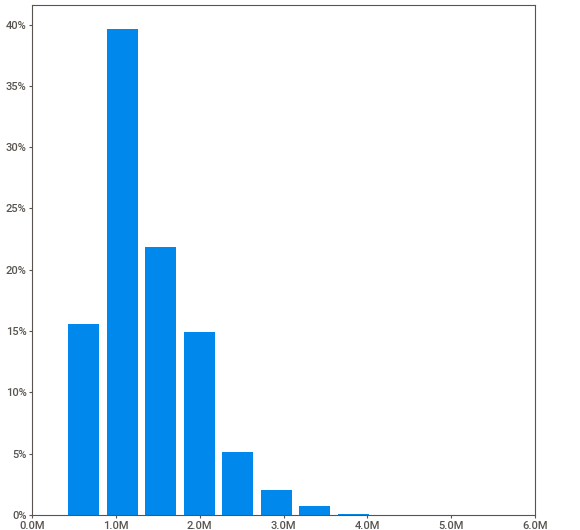
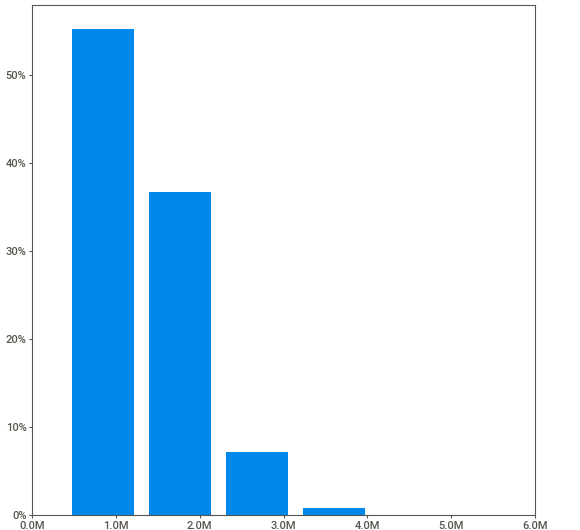
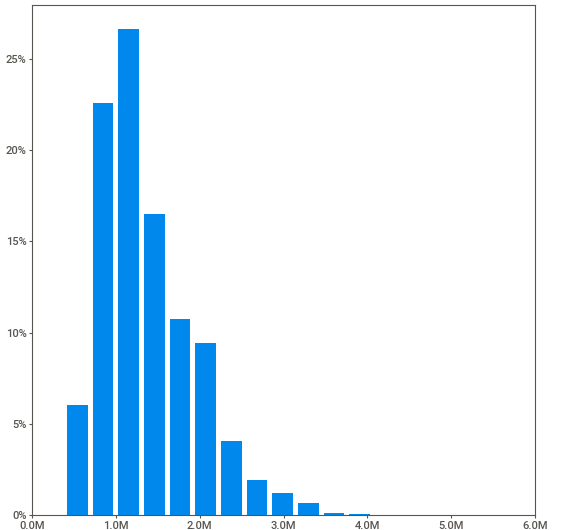
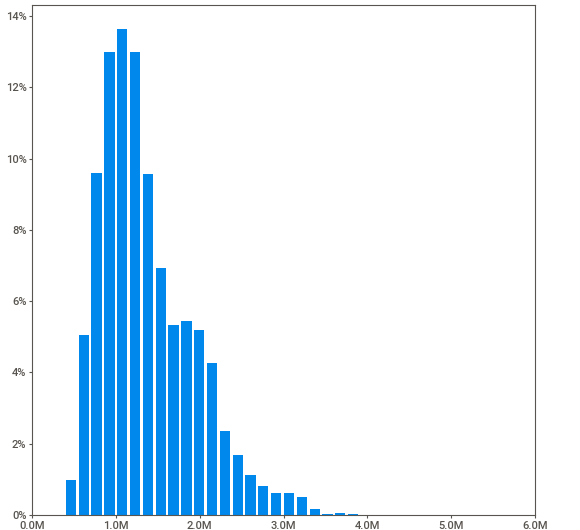
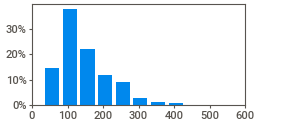
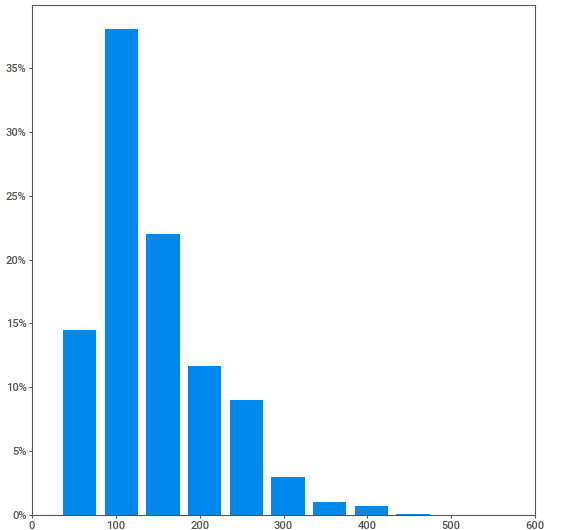
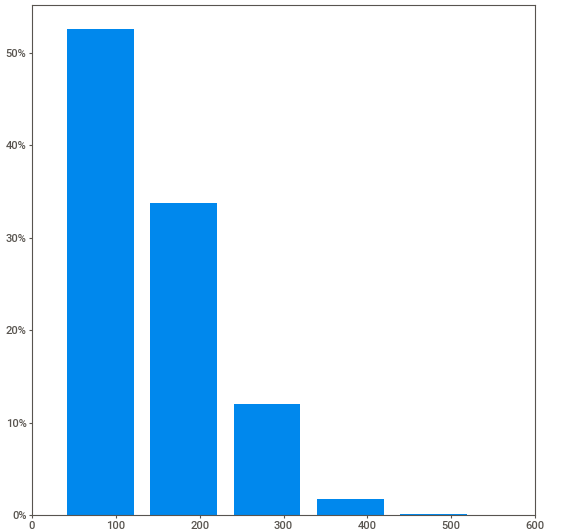
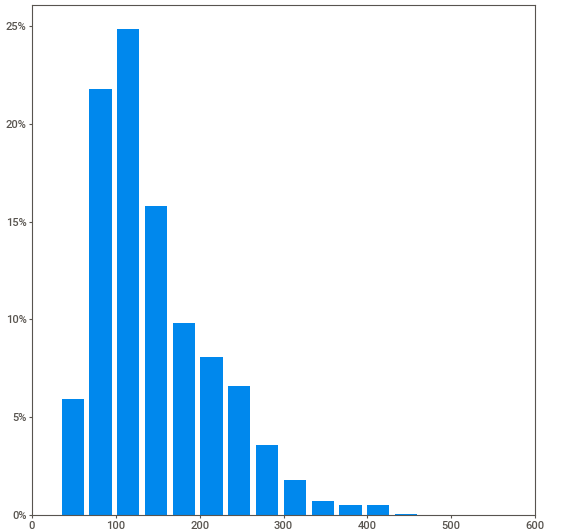
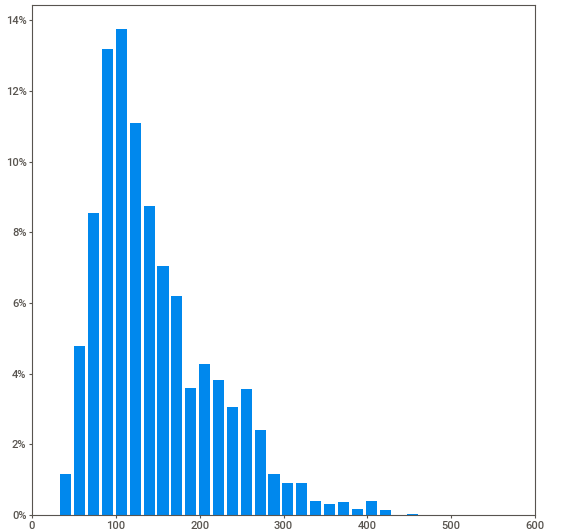
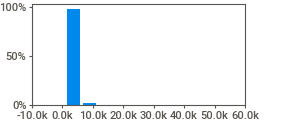
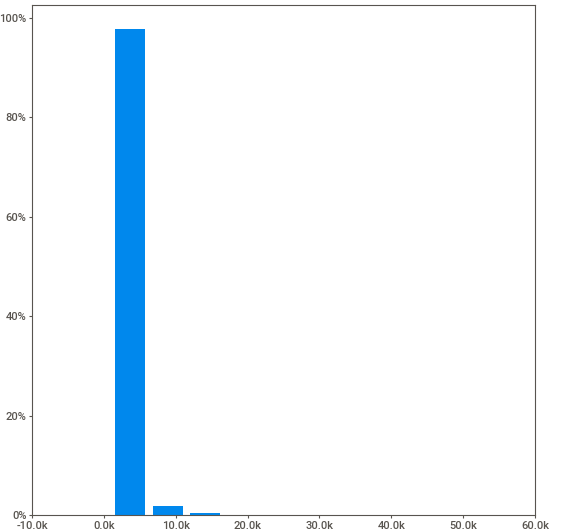
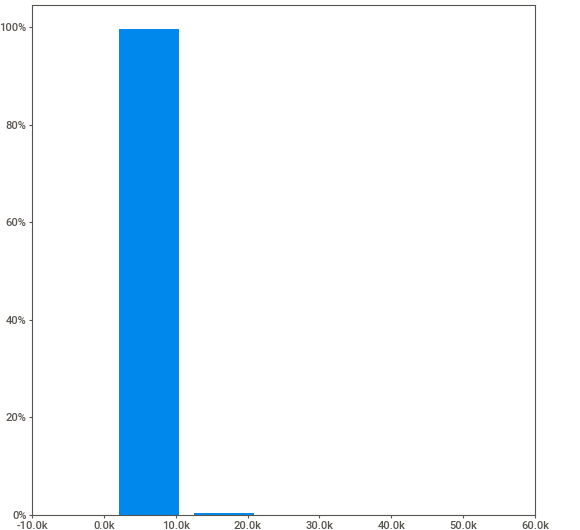
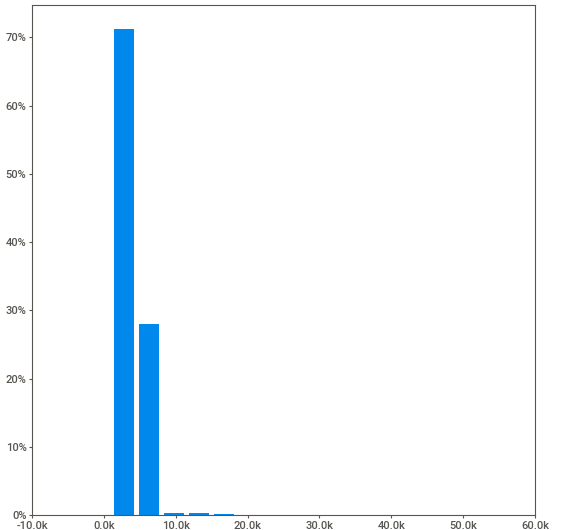
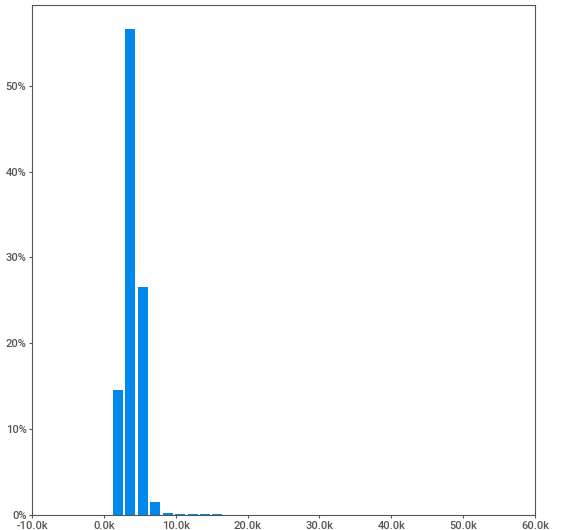
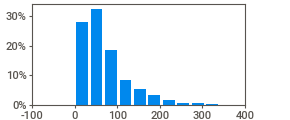
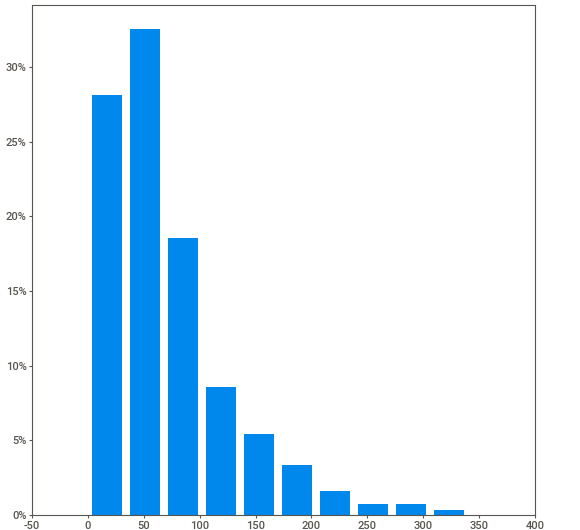
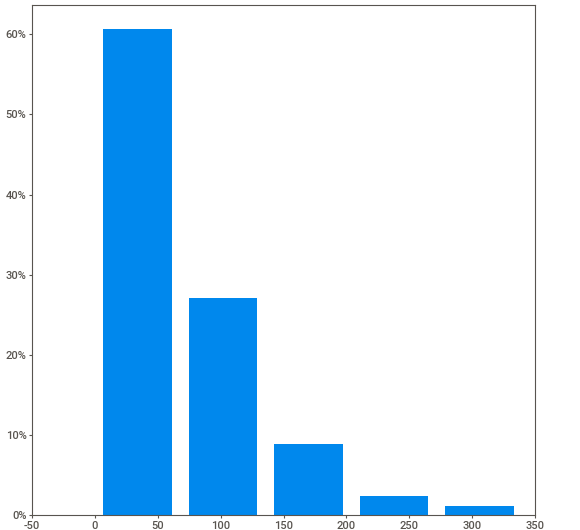
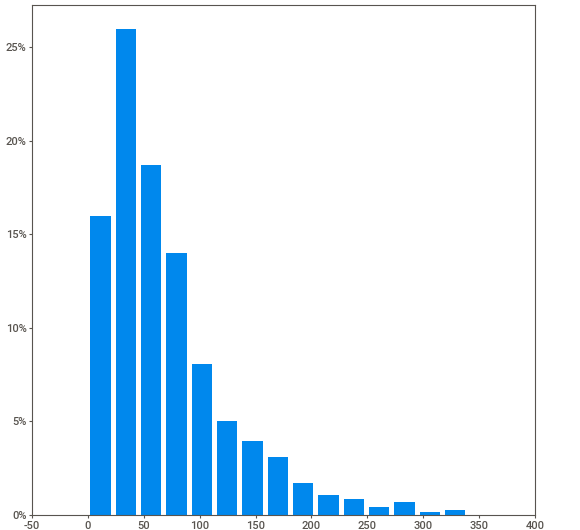
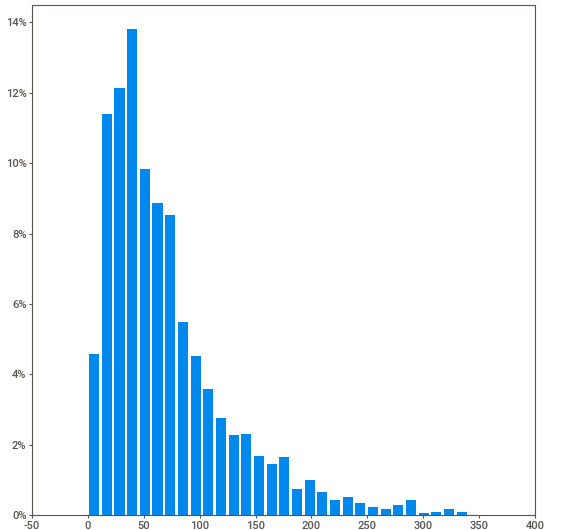
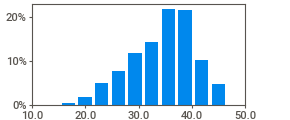
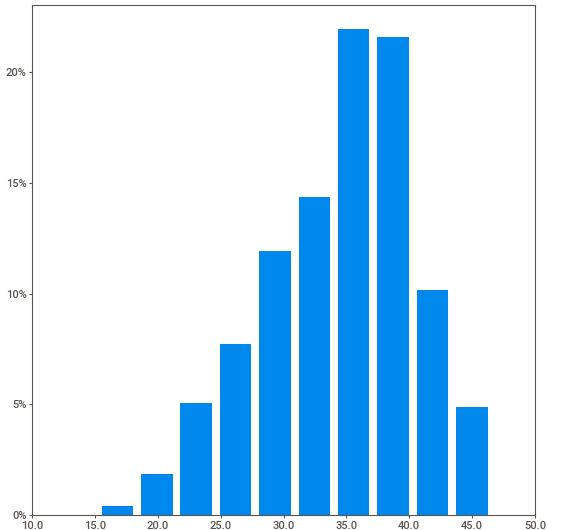
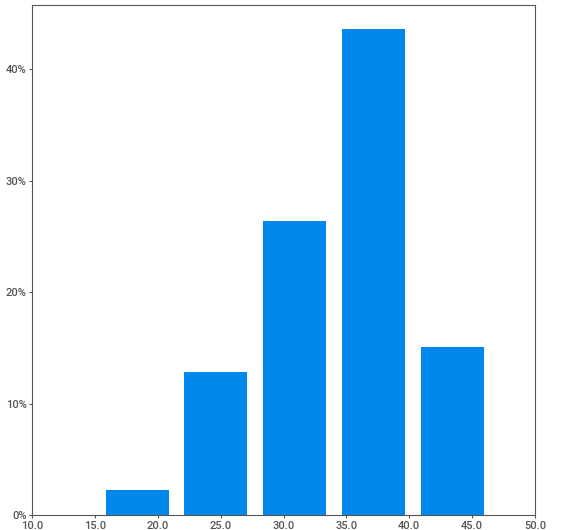
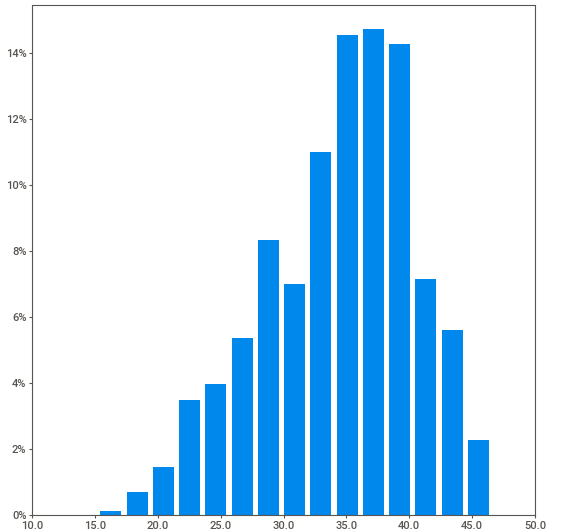
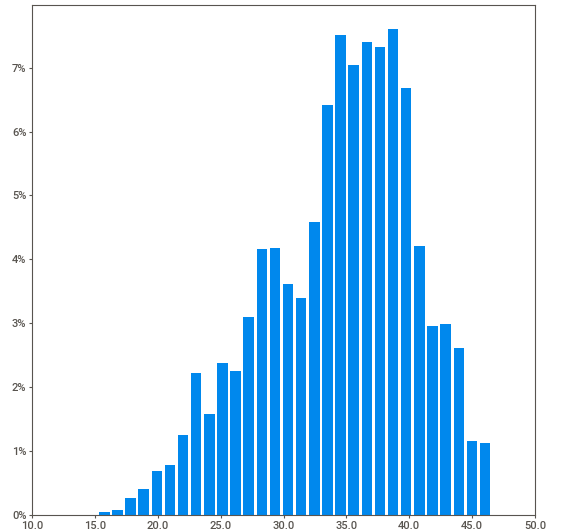
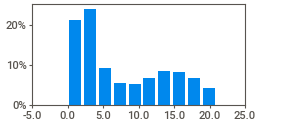
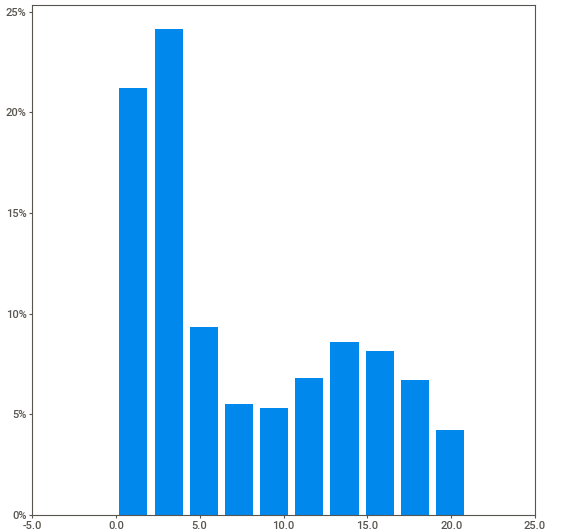
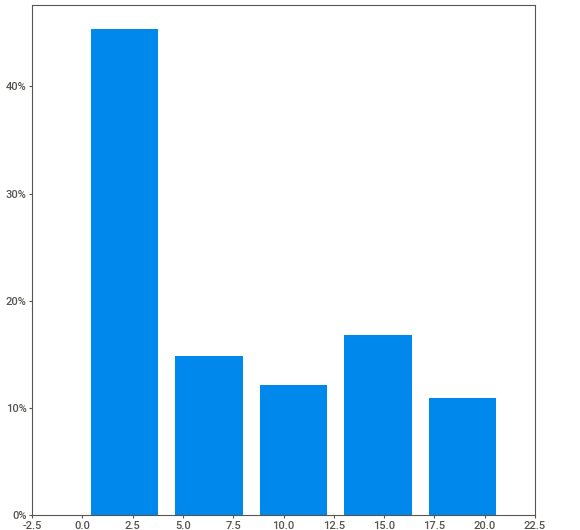
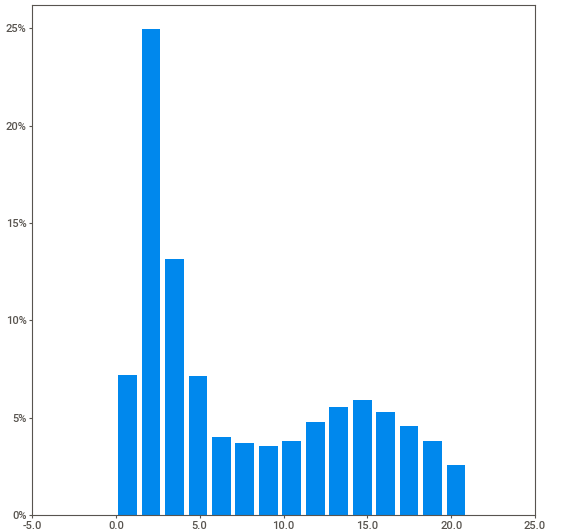
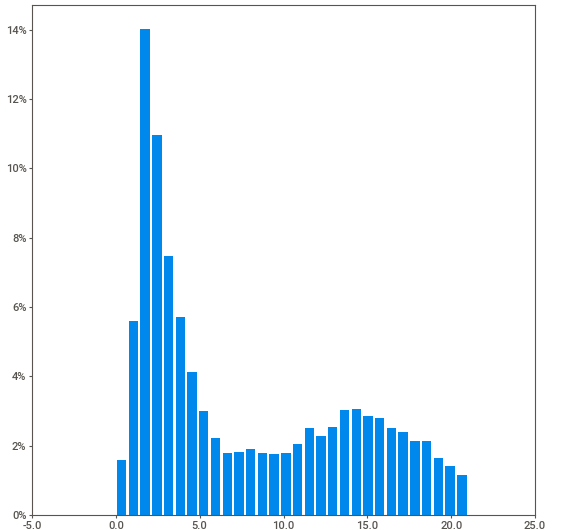
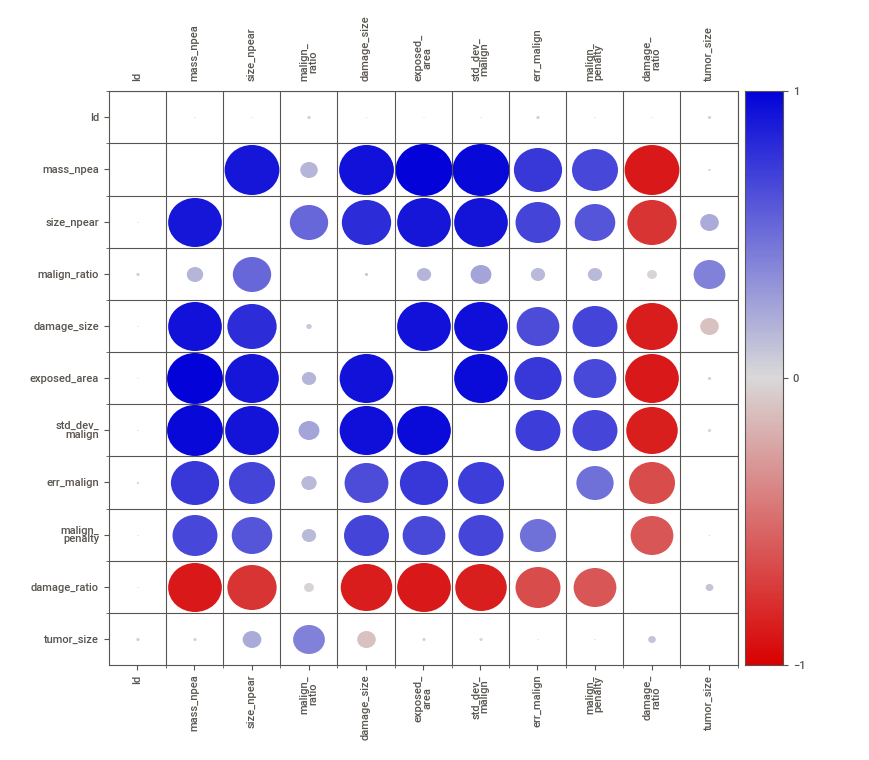
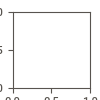

In [ ]:
#analyzing the dataset
tumor_train_report = sv.analyze(tumor_train)
#display the report
tumor_train_report.show_notebook(w=1500, h=300, scale=0.8)


In [ ]:
tumor_test.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1830 non-null   int64  
 1   mass_npea       1830 non-null   float64
 2   size_npear      1830 non-null   float64
 3   malign_ratio    1830 non-null   float64
 4   damage_size     1830 non-null   float64
 5   exposed_area    1830 non-null   float64
 6   std_dev_malign  1830 non-null   float64
 7   err_malign      1830 non-null   float64
 8   malign_penalty  1830 non-null   int64  
 9   damage_ratio    1830 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 143.1 KB


In [ ]:
column_names = ['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','damage_ratio','tumor_size','std_dev_malign','err_malign','malign_penalty']

In [ ]:
#sns.pairplot(tumor_train[['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','damage_ratio','tumor_size']],diag_kind="kde")

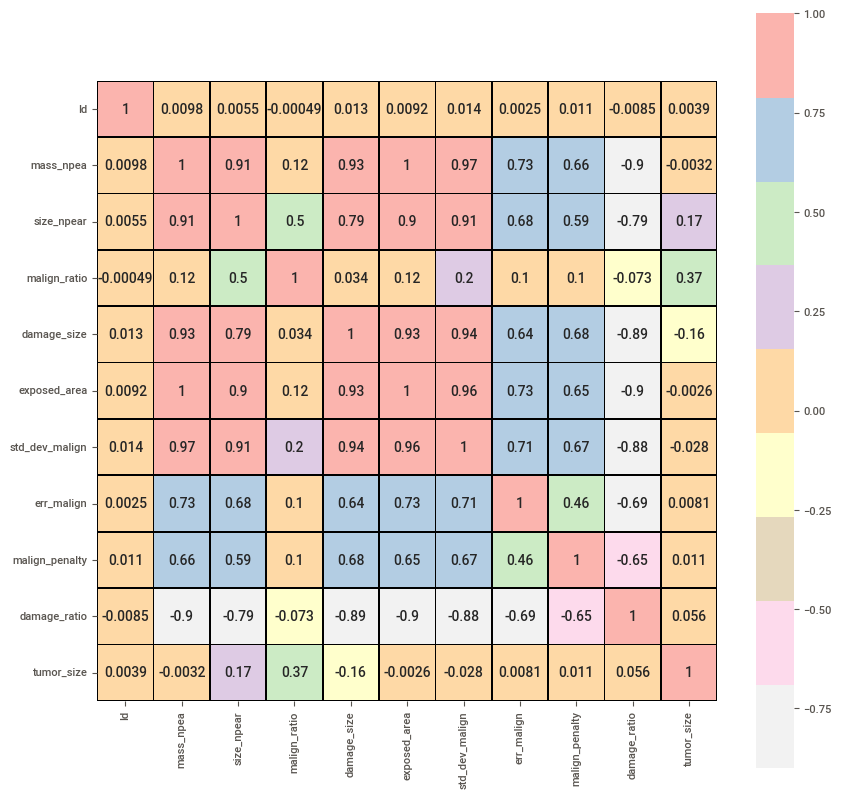

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tumor_train.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax)

Strong correlations are observed in some variables such as std_dev_malign, mass_npea, size_npear, damage_size,exposed_area, damage_ratio , multi-collinear dataset

**UniVariate**

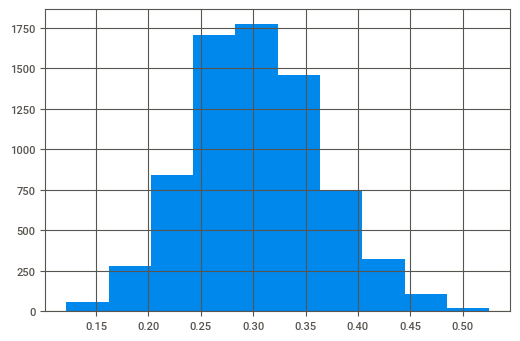

In [ ]:
tumor_train['malign_ratio'].hist()

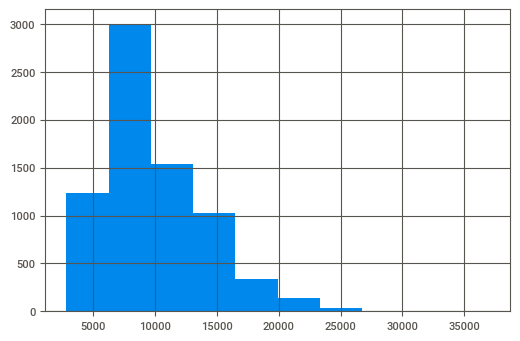

In [ ]:
tumor_train['mass_npea'].hist()

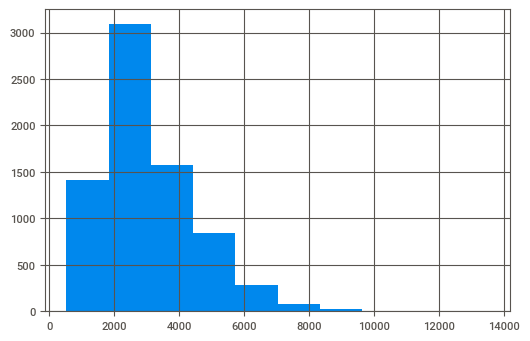

In [ ]:
tumor_train['size_npear'].hist()

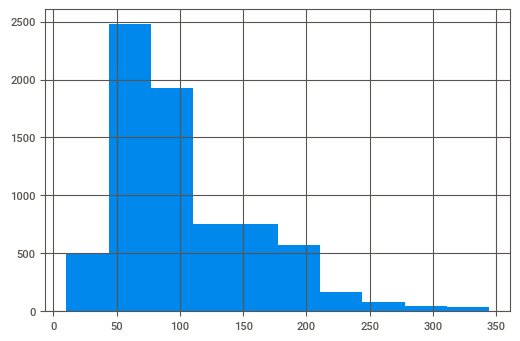

In [ ]:
tumor_train['damage_size'].hist()

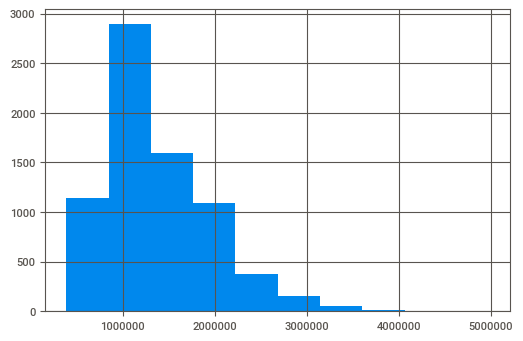

In [ ]:
tumor_train['exposed_area'].hist()

**Outlier check**

In [ ]:
tumor_train['tumor_size'].value_counts().head(5)

0.000    43
2.850     7
2.006     7
2.012     6
1.820     6
Name: tumor_size, dtype: int64

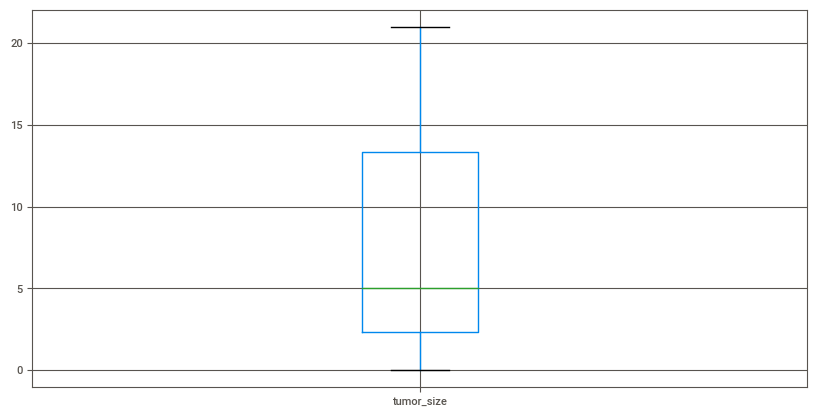

In [ ]:
plt.figure(figsize=(10,5))
tumor_train.boxplot(column='tumor_size')

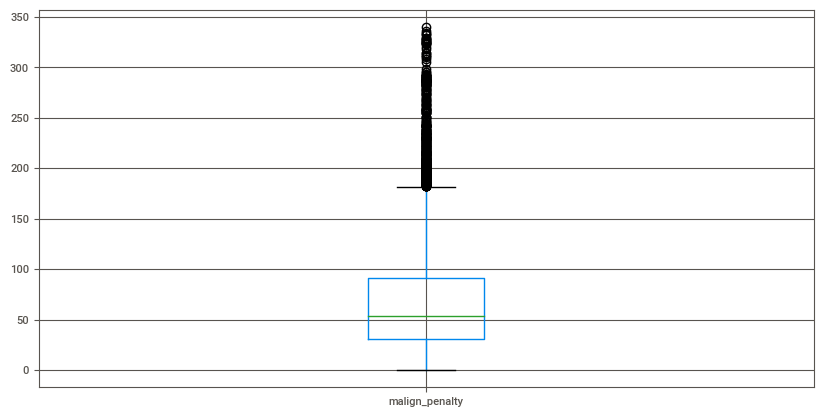

In [ ]:
plt.figure(figsize=(10,5))
tumor_train.boxplot(column='malign_penalty')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


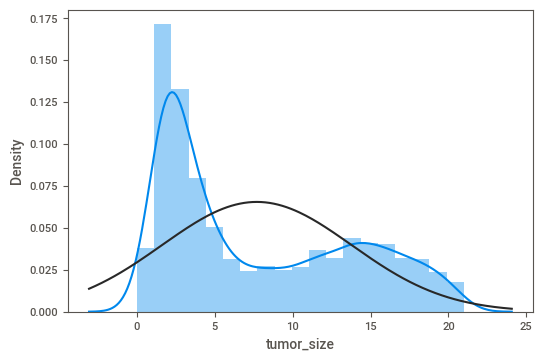

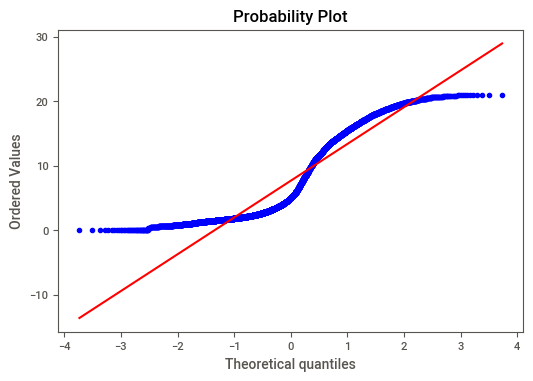

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.distplot(tumor_train['tumor_size'],fit=norm);
fig = plt.figure()
res = stats.probplot(tumor_train['tumor_size'], plot=plt)

There is no missing data but instead we have a different obstacle that we have to overcome - bimodal distribution of the target variable.

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(tumor_train['tumor_size'].values.reshape(-1, 1))

tumor_train['target_class'] = gmm.predict(tumor_train['tumor_size'].values.reshape(-1, 1))

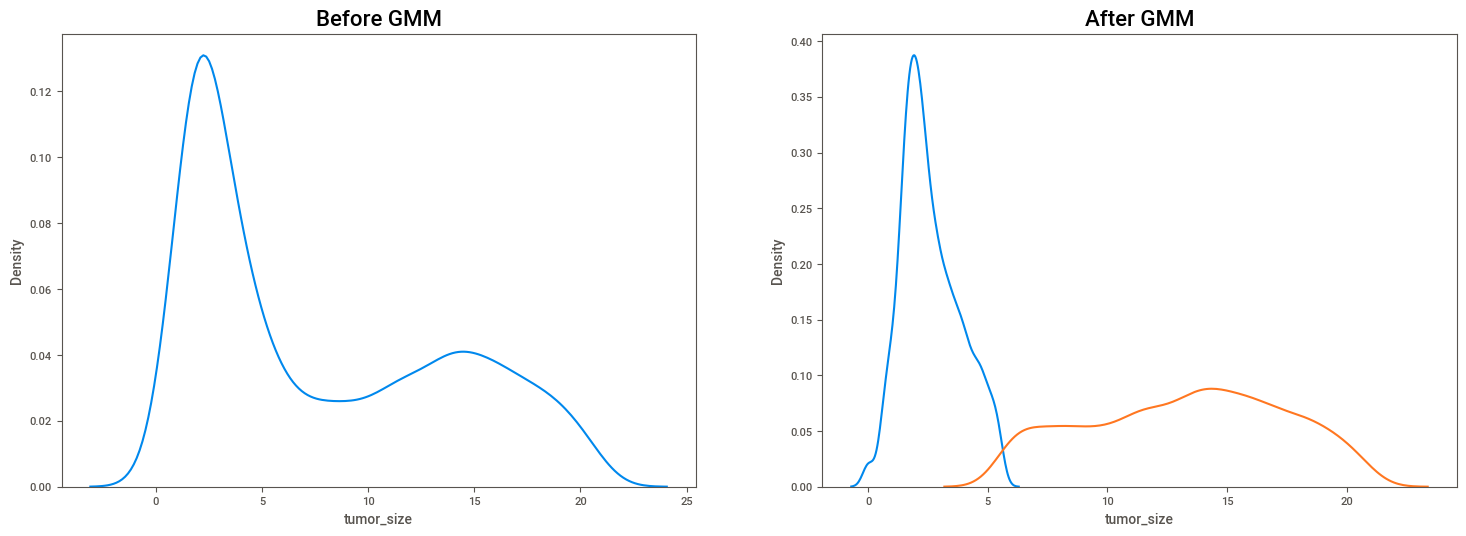

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=tumor_train.tumor_size, ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=tumor_train[tumor_train.target_class==0].tumor_size, label='Component 1', ax=ax[1])
sns.kdeplot(data=tumor_train[tumor_train.target_class==1].tumor_size, label='Component 2', ax=ax[1])
ax[1].set_title('After GMM', fontsize=16)
plt.show()

Text(0, 0.5, 'malignant dimension')

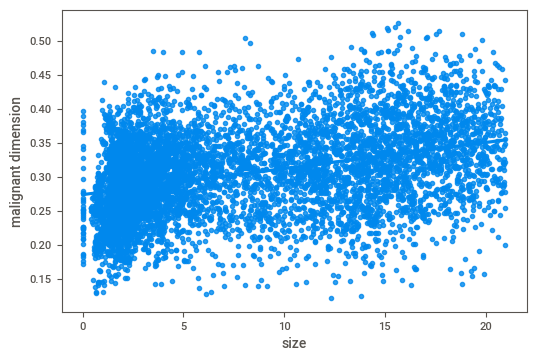

In [ ]:
sns.regplot(x=tumor_train['tumor_size'],y=tumor_train['malign_ratio'])
plt.xlabel('size')
plt.ylabel('malignant dimension')

Text(0, 0.5, 'damage size')

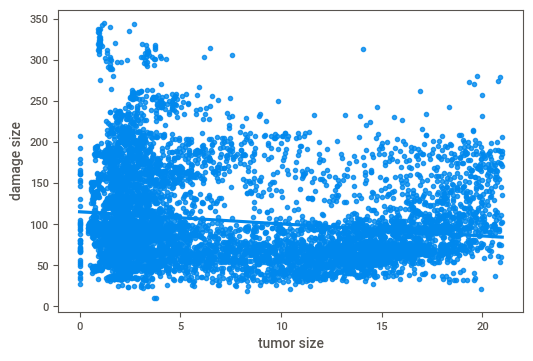

In [ ]:
sns.regplot(x=tumor_train['tumor_size'],y=tumor_train['damage_size'])
plt.xlabel('tumor size')
plt.ylabel('damage size')

In [ ]:
#tumor_train.drop_duplicates()

In [ ]:
tumor_train.shape

(7316, 12)

**spliting dataset into X,Y**

In [ ]:
#16. Train, test split
from sklearn.model_selection import train_test_split
tumor_train_labels = ['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','damage_ratio','std_dev_malign','err_malign','malign_penalty']
X_train=tumor_train[tumor_train_labels]
y_train = tumor_train['tumor_size']
#train_dataset = dataset.sample(frac=0.8,random_state=0)
#X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.2,random_state=0 )
X_test = tumor_test[tumor_train_labels]

In [ ]:
X_train.shape
#val_data = tumor_train.drop(tumor_train.index)

(7316, 9)

In [ ]:
y_train.shape  #tumor_train_labels = tumor_train.pop('tumor_size')

(7316,)

In [ ]:
#X_val.shape

In [ ]:
X_test.shape

(1830, 9)

In [ ]:
X_train_stats = X_train.sample(frac=0.8,random_state=0)

In [ ]:
X_train_stats=X_train_stats.describe().transpose()
X_train_stats

,count,mean,std,min,25%,50%,75%,max
mass_npea,5853.0,9.908087e+03,4039.193919,3114.98000,6990.49000,8.878930e+03,1.212450e+04,3.699540e+04
size_npear,5853.0,3.037250e+03,1452.857834,572.70000,1995.18000,2.693140e+03,3.838740e+03,1.353500e+04
malign_ratio,5853.0,3.034839e-01,0.062578,0.12441,0.25919,3.009900e-01,3.437100e-01,5.253000e-01
damage_size,5853.0,1.039467e+02,55.178840,10.31010,63.95880,8.887090e+01,1.349730e+02,3.443460e+02
exposed_area,5853.0,1.373261e+06,561510.400947,423115.49730,959367.50070,1.237437e+06,1.693368e+06,4.978616e+06
damage_ratio,5853.0,3.444132e+01,5.997757,15.22800,30.20400,3.525730e+01,3.887110e+01,4.654640e+01
std_dev_malign,5853.0,1.464917e+02,70.142493,33.52250,95.75880,1.266160e+02,1.827930e+02,5.288900e+02
err_malign,5853.0,3.986515e+03,1517.682621,1089.19000,3175.08000,3.843320e+03,4.672340e+03,5.303130e+04
malign_penalty,5853.0,7.010354e+01,55.458271,0.00000,32.00000,5.500000e+01,9.200000e+01,3.360000e+02


# **Feature Importance**

Feature: 0, Score: 0.00186
Feature: 1, Score: 0.00146
Feature: 2, Score: 17.19825
Feature: 3, Score: -0.11430
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.09785
Feature: 6, Score: -0.02461
Feature: 7, Score: -0.00041
Feature: 8, Score: 0.01476


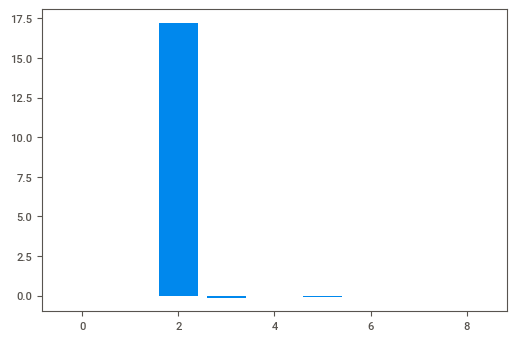

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model=LinearRegression()
model.fit(X_train,y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
features = pd.DataFrame(model.coef_,tumor_train_labels)
features.columns = ['Coeffecient']

features

,Coeffecient
mass_npea,0.001856
size_npear,0.001459
malign_ratio,17.198248
damage_size,-0.114305
exposed_area,-0.000005
damage_ratio,-0.097848
std_dev_malign,-0.024608
err_malign,-0.000415
malign_penalty,0.014759


# Normalization of data

In [ ]:
X_train_norm = (X_train - X_train_stats['mean']) / X_train_stats['std']


In [ ]:
input_shape=(len(X_train.keys()),)
input_shape

(9,)

In [ ]:
input_shape= (X_train.shape[1],)

In [ ]:
input_shape


(9,)

# Model
**Lets build the model**

In [ ]:
#def build_model():
  #model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                           # layers.Dense(64, activation='relu'),
                            #layers.Dense(1)])

  #Defining the optimizer with a specific learning rate of 0.001
  #optimizer = tf.keras.optimizers.RMSprop(0.01)

  #Compiling the model
 # model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  #model.build(input_shape)
  #return model

In [ ]:
results = list()

In [ ]:
# define the keras model

model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
#Defining the optimizer with a specific learning rate of 0.001
#optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
# compile the keras model
model.compile(loss='mae', optimizer='RMSprop', metrics=['mae','mse'])
#return model
model.build(input_shape)
# fit the keras model on the dataset
#model.fit(X_train, y_train, epochs=500,  verbose=0)
# evaluate the keras model
#mae = model.evaluate(X_val, y_val, verbose=0)
#print(mae)
#results.append(mae)



In [ ]:
#model = build_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


# Inspect the model

In [ ]:
example_batch = X_train_norm[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.09600689],
       [-0.07171541],
       [-0.21155727],
       [-0.29958695],
       [ 0.04293617],
       [-0.09092756],
       [-0.257146  ],
       [ 0.00084556],
       [-0.24864088],
       [-0.2932111 ]], dtype=float32)

In [ ]:
EPOCHS = 1000

In [ ]:
history = model.fit(X_train_norm, y_train, epochs=EPOCHS,
                    validation_split=0.2,verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:5.3135,  mae:5.3135,  mse:52.3633,  val_loss:4.4295,  val_mae:4.4295,  val_mse:34.3739,  
....................................................................................................
Epoch: 100, loss:3.0685,  mae:3.0685,  mse:19.5873,  val_loss:3.3021,  val_mae:3.3021,  val_mse:22.1143,  
....................................................................................................
Epoch: 200, loss:2.8778,  mae:2.8778,  mse:17.8722,  val_loss:3.1422,  val_mae:3.1422,  val_mse:21.0171,  
....................................................................................................
Epoch: 300, loss:2.7364,  mae:2.7364,  mse:16.6724,  val_loss:3.1848,  val_mae:3.1848,  val_mse:21.9711,  
....................................................................................................
Epoch: 400, loss:2.6370,  mae:2.6370,  mse:15.8325,  val_loss:3.1044,  val_mae:3.1044,  val_mse:20.9163,  
..............................................................

In [ ]:

# fit the keras model on the dataset
#model.fit(X_train, y_train,epochs=150, batch_size=10)

In [ ]:

# fit and train the keras model on the dataset
#model.fit(X_train, y_train, epochs=500,  verbose=0)
# evaluate the keras model
#mae = model.evaluate(X_val, y_val, verbose=0)
#print(mae)
#results.append(mae)



In [ ]:
# evaluate the keras model
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.360042,2.360042,13.211980,3.155492,3.155492,21.707649,995
996,2.358371,2.358371,13.152224,3.116886,3.116886,20.668587,996
997,2.365942,2.365942,13.401536,3.206963,3.206963,21.990002,997
998,2.350137,2.350137,13.104127,3.191405,3.191405,20.680157,998
999,2.362808,2.362808,13.269735,3.183043,3.183043,22.173578,999


In [ ]:
X_test_norm = (X_test - X_train_stats['mean']) / X_train_stats['std']

In [ ]:
X_test_norm.head(5)

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,damage_ratio,std_dev_malign,err_malign,malign_penalty
0,-0.233174,-0.514262,-0.768219,-0.318697,-0.290479,0.148953,-0.333502,-0.122177,-0.596909
1,3.353073,1.711448,-1.085901,3.893128,3.306723,-2.440932,3.628276,1.480655,1.512785
2,0.008703,0.246411,0.606857,0.284099,-0.104699,-0.812023,0.519162,0.311109,2.017670
3,-0.171058,-0.934310,-1.937314,-0.269056,-0.103178,-0.399819,-0.284417,0.123171,-0.488719
4,0.745672,1.203105,1.068838,1.197856,0.712916,-1.067402,0.811510,0.602652,1.639006


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [tumor_size]')

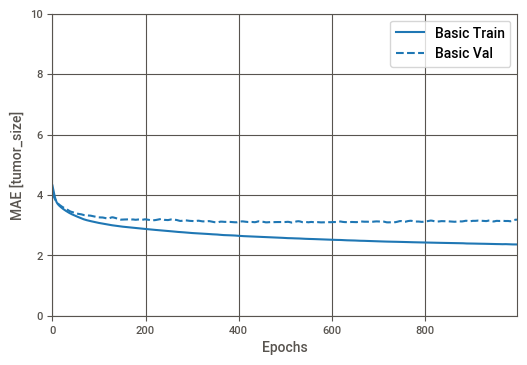

In [ ]:
plotter.plot({'Basic': history}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [tumor_size]')

Text(0, 0.5, 'MSE [tumor_size^2]')

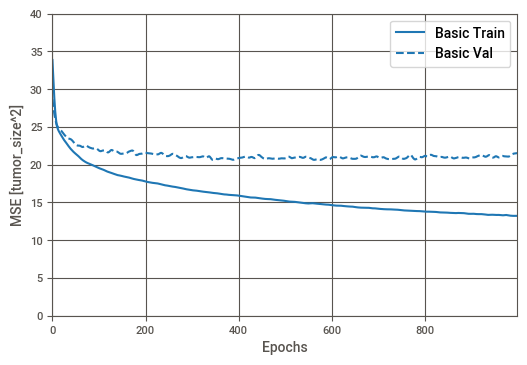

In [ ]:
plotter.plot({'Basic': history}, metric="mse")
plt.ylim([0, 40])
plt.ylabel('MSE [tumor_size^2]')

In [ ]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
early_history = model.fit(X_train_norm, y_train, epochs=EPOCHS, validation_split=0.2,
                          verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2.3569,  mae:2.3569,  mse:13.1412,  val_loss:3.1589,  val_mae:3.1589,  val_mse:21.7227,  
..............

In [ ]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9,2.352620,2.352620,13.184255,3.196843,3.196843,22.081621,9
10,2.346386,2.346386,13.100471,3.136658,3.136658,21.193775,10
11,2.344106,2.344106,13.057732,3.159038,3.159038,21.047394,11
12,2.351732,2.351732,13.143827,3.230610,3.230610,22.550909,12
13,2.354460,2.354460,13.218894,3.177344,3.177344,21.575012,13


Text(0, 0.5, 'MAE [tumor_size]')

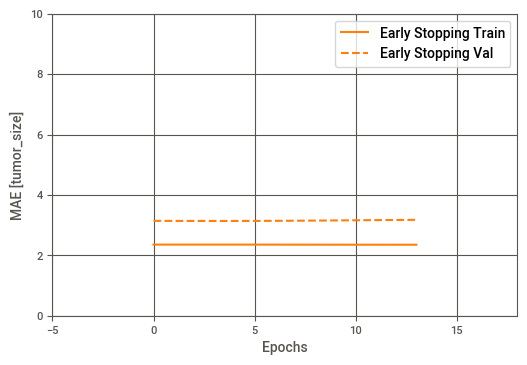

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric="mae")
plt.ylim([0, 10])
plt.xlim([-5, 18])
plt.ylabel('MAE [tumor_size]')

- The graph shows that on the validation set, the error is around **+/- 3.18** tumor_size. 

# Increasing the Number of Hidden Layers and Hidden Units

- Here, we are increasing the number of hidden layers from 2 to 4 i. e. adding 2 additional layers.

- Next, we are using 128 hidden units instead of 64.

In [ ]:
model2= Sequential()

model2.add(Dense(256, activation='relu',input_shape=(X_train.shape[1],)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mae', optimizer='RMSprop', metrics=['mae','mse'])

In [ ]:
model2.build(input_shape)

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_large = model2.fit(X_train_norm,y_train, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[early_stop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:4.3838,  mae:4.3838,  mse:35.1016,  val_loss:3.9150,  val_mae:3.9150,  val_mse:27.4742,  
..................................................................

In [ ]:
hist_large = pd.DataFrame(history_large.history)
hist_large['epoch'] = history_large.epoch
hist_large.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
61,2.253192,2.253192,12.805382,2.871371,2.871371,18.851940,61
62,2.251565,2.251565,12.873374,2.857233,2.857233,20.545750,62
63,2.233806,2.233806,12.741126,2.890086,2.890086,19.837732,63
64,2.219187,2.219187,12.502544,2.857733,2.857733,18.865452,64
65,2.211720,2.211720,12.468397,2.879016,2.879016,19.926107,65


Text(0, 0.5, 'MAE [tumor_size]')

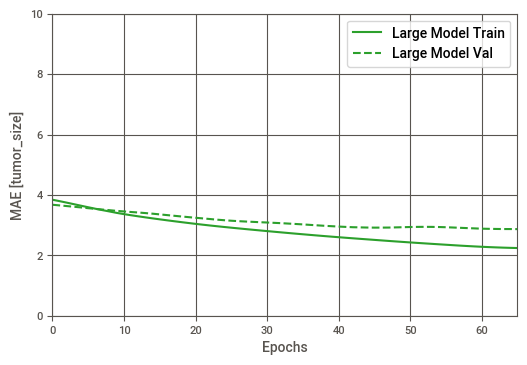

In [ ]:
plotter.plot({'Large Model': history_large}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [tumor_size]')

- We get slightly more decrease in the validation set error.

- We can see that the validation error decrease up to certain epoch and becomes almost constant.

# Combined L2 + Dropout

In [ ]:
from tensorflow.python.keras import regularizers
model3= Sequential()

model3.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(X_train.shape[1],)))
layers.Dropout(0.2),
model3.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
layers.Dropout(0.2),
model3.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
layers.Dropout(0.2),
model3.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
layers.Dropout(0.2),
model3.add(Dense(1))
model3.compile(loss='mae', optimizer='RMSprop', metrics=['mae','mse'])

In [ ]:
model3.build(input_shape)

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_l2_dropout = model3.fit(X_train_norm,y_train, epochs=200, validation_split=0.2,
                          verbose=0, callbacks=[early_stop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2.8685,  mae:2.6670,  mse:16.5627,  val_loss:3.2443,  val_mae:3.0419,  val_mse:21.7245,  
......................

In [ ]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
17,2.725529,2.501909,15.046596,3.183767,2.959697,19.854242,17
18,2.722472,2.497796,14.993596,3.236210,3.009993,20.153336,18
19,2.707011,2.480334,14.938444,3.202535,2.975455,20.630341,19
20,2.698584,2.471128,14.688726,3.144152,2.915899,19.737015,20
21,2.711143,2.481812,14.841183,3.143080,2.913181,20.128595,21


Text(0, 0.5, 'MAE [tumor_size]')

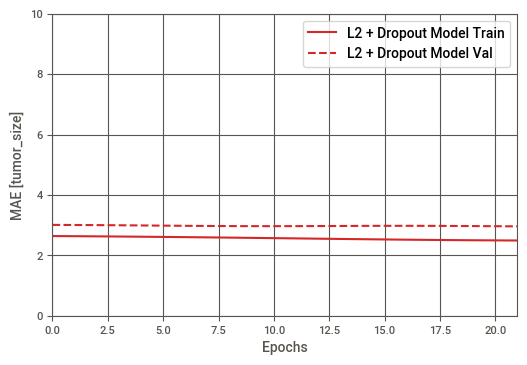

In [ ]:
plotter.plot({'L2 + Dropout Model': history_l2_dropout}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [tumor_size]')

# Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization  
model4 = keras.Sequential([layers.Dense(256, input_shape=[len(X_train.keys())]),
                          BatchNormalization(),
                          layers.Dense(128),
                          BatchNormalization(),
                          layers.Dense(64),
                          BatchNormalization(),
                          layers.Dense(32),
                          BatchNormalization(),
                          layers.Dense(1)])

In [ ]:
model4.compile(loss='mae', optimizer='RMSprop', metrics=['mae','mse'])

In [ ]:
history_l4 = model4.fit(X_train_norm,y_train, epochs=200, validation_split=0.2,
                          verbose=0,callbacks=[early_stop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:4.1675,  mae:4.1675,  mse:27.5028,  val_loss:4.1961,  val_mae:4.1961,  val_mse:27.6548,  
...............................

In [ ]:
hist_l4 = pd.DataFrame(history_l4.history)

In [ ]:
hist_l4['epoch'] = history_l4.epoch
hist_l4.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
26,4.164121,4.164121,27.276575,4.159785,4.159785,26.476782,26
27,4.169965,4.169965,27.522404,4.114980,4.114980,26.665937,27
28,4.156849,4.156849,27.122484,4.135818,4.135818,26.863068,28
29,4.171697,4.171697,27.364798,4.155432,4.155432,26.986650,29
30,4.147491,4.147491,27.195177,4.124574,4.124574,26.716852,30


Text(0, 0.5, 'MAE [tumor_size]')

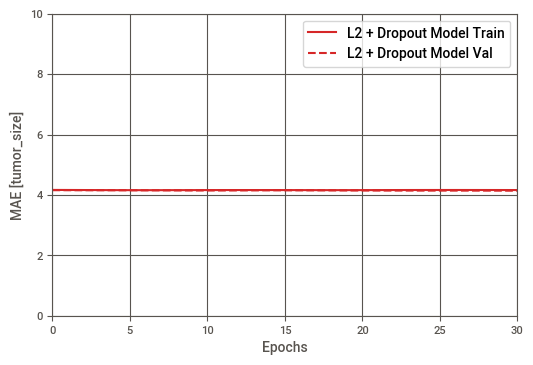

In [ ]:
plotter.plot({'L2 + Dropout Model': history_l4}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [tumor_size]')